In [2]:
import pandas as pd
cereal = pd.read_csv("cereal.csv")
print(cereal.shape)

(77, 16)


In [3]:
cereal.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [4]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
X=cereal.iloc[:, 3:]
X_standardized=preprocessing.scale(X)
X_standardized=pd.DataFrame(X_standardized)
X_standardized.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01
mean,-1.258012e-16,5.767392e-17,1.013349e-16,-5.190653e-17,1.463476e-16,-8.651089e-18,-7.425518e-17,-6.199947e-17,5.190653e-17,-9.804567e-17,-1.982541e-16,1.665335e-16,-7.209240e-18
std,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00
min,-2.938605e+00,-1.420902e+00,-1.013072e+00,-1.917189e+00,-9.088244e-01,-3.669045e+00,-1.793978e+00,-1.370723e+00,-1.272550e+00,-1.460273e+00,-3.542628e+00,-2.469891e+00,-1.764349e+00
25%,-3.555846e-01,-5.014948e-01,-1.013072e+00,-3.563056e-01,-4.864980e-01,-6.109983e-01,-8.881661e-01,-7.918105e-01,-1.462701e-01,-1.460273e+00,-1.980675e-01,-6.532825e-01,-6.801207e-01
50%,1.610194e-01,4.179123e-01,-1.298811e-02,2.440343e-01,-6.417167e-02,-1.405296e-01,1.764569e-02,-8.581921e-02,-1.462701e-01,-2.512297e-01,-1.980675e-01,-3.072619e-01,-1.623340e-01
75%,1.610194e-01,4.179123e-01,9.870962e-01,6.042382e-01,3.581547e-01,5.651734e-01,9.234575e-01,3.377756e-01,-1.462701e-01,9.578133e-01,-1.980675e-01,7.740527e-01,5.848967e-01
max,2.744040e+00,3.176134e+00,3.987349e+00,1.924986e+00,5.003745e+00,1.976579e+00,1.829269e+00,3.302939e+00,3.232570e+00,9.578133e-01,3.146493e+00,2.936682e+00,3.657211e+00


In [5]:
kmeans_model = KMeans(n_clusters=2, init='k-means++').fit(X_standardized)
kmeans_model.inertia_

815.9459911110032

Text(0, 0.5, 'Inertia')

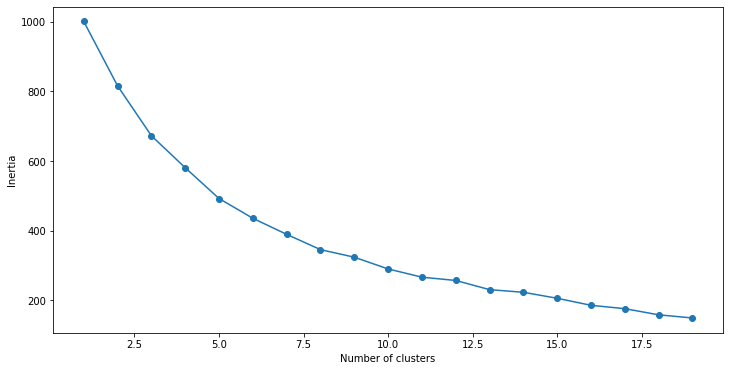

In [18]:
import matplotlib.pyplot as plt
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(X_standardized)
    SSE.append(kmeans.inertia_)
    
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [19]:
kmeans_model = KMeans(n_clusters=7, init='k-means++').fit(X_standardized)
kmeans_model.inertia_

381.31098411512954

In [20]:
y_kmeans=kmeans_model.predict(X_standardized)
cluster = pd.DataFrame(y_kmeans)
X['cluster']=cluster
X['cluster'].value_counts()
#print(X.loc[X['cluster'].isin([4])])

0    21
1    14
4    12
6    11
5    11
2     5
3     3
Name: cluster, dtype: int64

In [21]:
kmeans_mean_cluster = pd.DataFrame(round(X.groupby('cluster').mean(),1))
kmeans_mean_cluster

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
cluster,,,,,,,,,,,,,
0,111.4,1.5,1.0,171.4,0.5,12.6,11.4,41.6,25.0,1.8,1.0,0.9,28.6
1,105.0,2.6,0.6,242.1,1.3,19.0,3.3,66.8,25.0,1.5,1.0,1.0,45.3
2,112.0,2.6,0.8,212.0,1.4,18.8,4.8,69.0,100.0,3.0,1.1,1.0,40.0
3,63.3,4.0,0.7,176.7,11.0,6.7,3.7,310.0,25.0,3.0,1.0,0.4,73.8
4,105.0,3.2,1.8,121.2,2.8,11.3,5.7,120.0,20.8,2.8,1.0,0.6,45.1
5,134.5,3.2,1.7,181.4,3.7,15.2,11.1,179.1,31.8,2.9,1.3,0.8,36.1
6,84.5,2.5,0.1,24.1,2.1,16.1,2.1,82.2,11.4,2.1,0.9,0.9,62.8


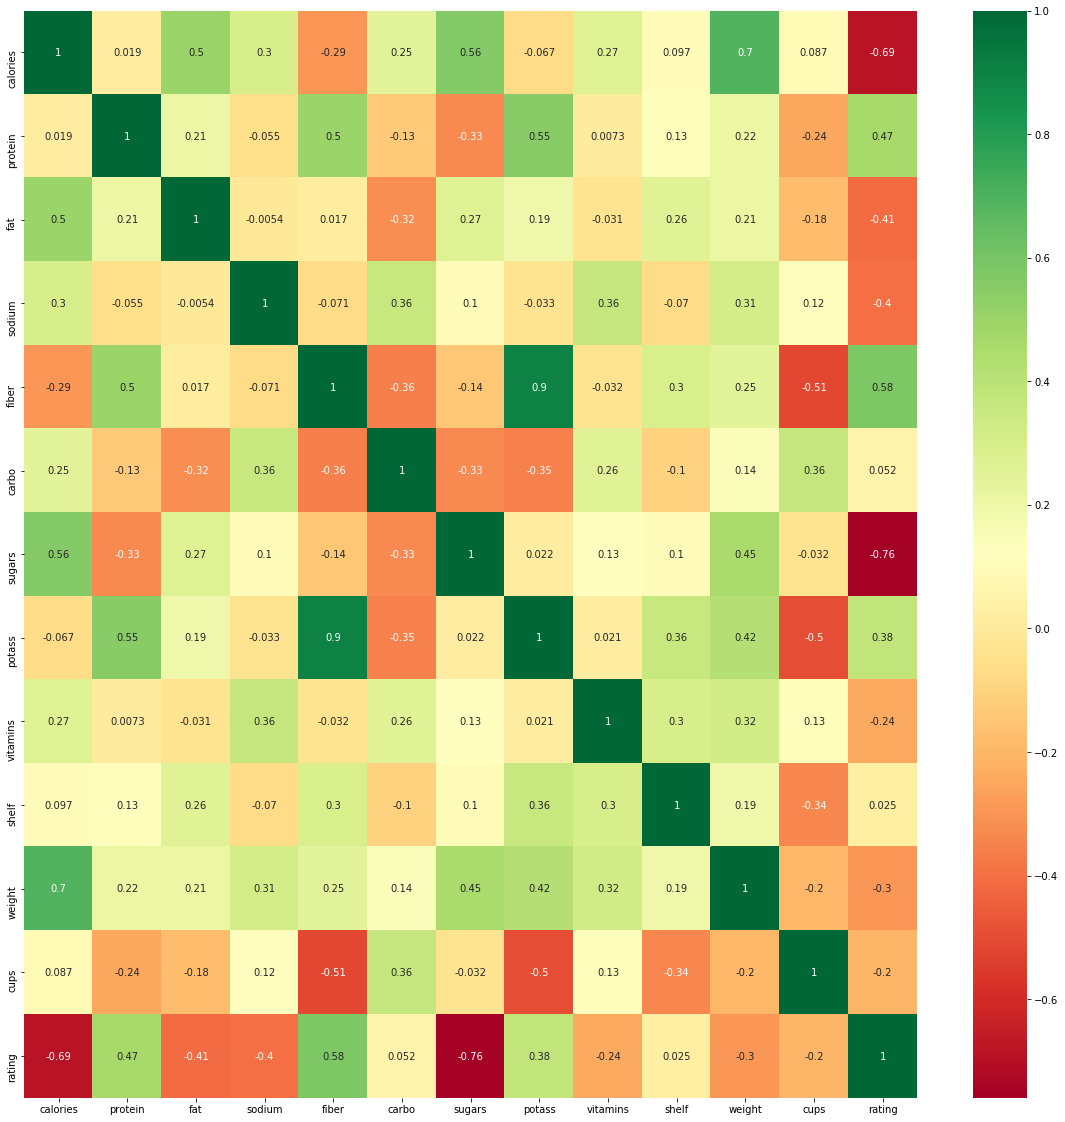

In [22]:
import seaborn as sns 
import matplotlib.pyplot as plt
# generating correlation heatmap 
x=cereal.iloc[:,3:12]
y = cereal.iloc[:,-1]
corrmat = cereal.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(cereal[top_corr_features].corr(),annot=True,cmap="RdYlGn")
# posting correlation heatmap to output console  
plt.show() 

In [23]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
df=cereal[['calories','fat','sodium','carbo','sugars','potass','vitamins','shelf','weight','cups','rating']]
df_standardized=preprocessing.scale(df)
df_standardized=pd.DataFrame(df_standardized)
kmeans_model = KMeans(n_clusters=2, init='k-means++').fit(df_standardized)
kmeans_model.inertia_

680.6764633142878

Text(0, 0.5, 'Inertia')

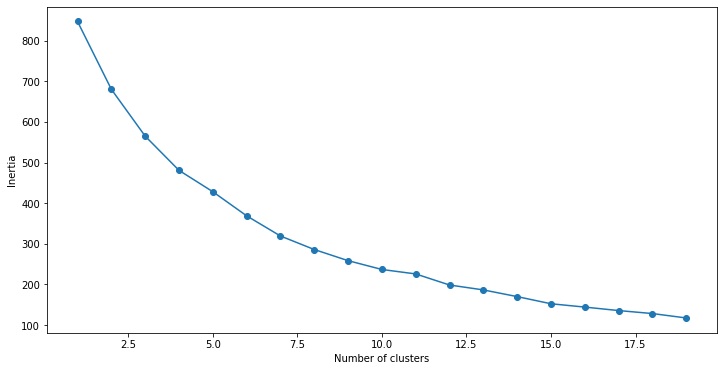

In [24]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(df_standardized)
    SSE.append(kmeans.inertia_)
    
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [25]:
kmeans_model = KMeans(n_clusters=7, init='k-means++').fit(df_standardized)
kmeans_model.inertia_

324.99117374493545

In [26]:
o_kmeans=kmeans_model.predict(df_standardized)
clstr = pd.DataFrame(o_kmeans)
df=pd.DataFrame(df)
df['Clstr']=clstr
df['Clstr'].value_counts()

0    19
1    18
5    12
4    11
3     9
2     5
6     3
Name: Clstr, dtype: int64

In [27]:
kmeans_mean_cluster = pd.DataFrame(round(df.groupby('Clstr').mean(),1))
kmeans_mean_cluster

,calories,fat,sodium,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
Clstr,,,,,,,,,,,
0,111.1,0.9,167.9,12.5,11.7,43.7,25.0,1.7,1.0,0.9,28.7
1,103.3,0.5,226.7,18.3,3.4,77.2,25.0,1.8,1.0,0.9,47.4
2,112.0,0.8,212.0,18.8,4.8,69.0,100.0,3.0,1.1,1.0,40.0
3,131.1,1.4,194.4,15.1,11.1,181.1,33.3,2.9,1.4,0.7,36.2
4,85.5,0.3,8.6,14.4,1.8,84.0,9.1,1.9,0.9,0.8,62.0
5,115.8,2.5,132.5,12.5,7.9,112.4,22.9,2.8,1.0,0.7,38.1
6,63.3,0.7,176.7,6.7,3.7,310.0,25.0,3.0,1.0,0.4,73.8


In [29]:
df.loc[df['Clstr']==6] 

,calories,fat,sodium,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Clstr
0,70,1,130,5.0,6,280,25,3,1.0,0.33,68.402973,6
2,70,1,260,7.0,5,320,25,3,1.0,0.33,59.425505,6
3,50,0,140,8.0,0,330,25,3,1.0,0.50,93.704912,6


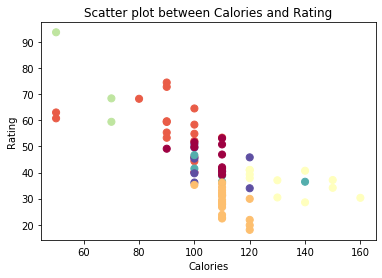

In [17]:
import matplotlib.pyplot as plt
import numpy as np
#'calories','fat','sodium','carbo','sugars','potass','vitamins','shelf','weight','cups','rating'
plt.scatter(X['calories'], X['rating'], c=o_kmeans, s=50, cmap='Spectral')
plt.title('Scatter plot between Calories and Rating')
plt.xlabel('Calories')
plt.ylabel('Rating')
plt.show()

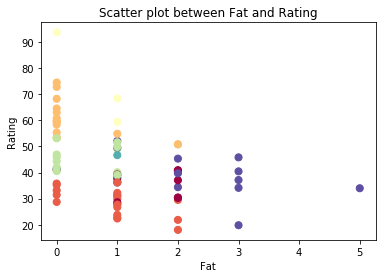

In [127]:
#'calories','fat','sodium','carbo','sugars','potass','vitamins','shelf','weight','cups','rating'
plt.scatter(X['fat'], X['rating'], c=o_kmeans, s=50, cmap='Spectral')
plt.title('Scatter plot between Fat and Rating')
plt.xlabel('Fat')
plt.ylabel('Rating')
plt.show()

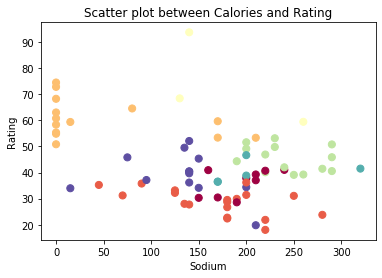

In [116]:
plt.scatter(X['sodium'], X['rating'], c=o_kmeans, s=50, cmap='Spectral')
plt.title('Scatter plot between Calories and Rating')
plt.xlabel('Sodium')
plt.ylabel('Rating')
plt.show()

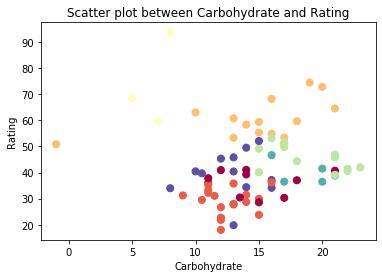

In [120]:
plt.scatter(X['carbo'], X['rating'], c=o_kmeans, s=50, cmap='Spectral')
plt.title('Scatter plot between Carbohydrate and Rating')
plt.xlabel('Carbohydrate')
plt.ylabel('Rating')
plt.show()

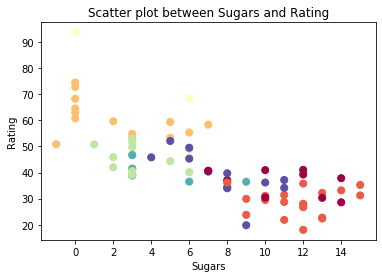

In [121]:
#'calories','fat','sodium','carbo','sugars','potass','vitamins','shelf','weight','cups','rating
plt.scatter(X['sugars'], X['rating'], c=o_kmeans, s=50, cmap='Spectral')
plt.title('Scatter plot between Sugars and Rating')
plt.xlabel('Sugars')
plt.ylabel('Rating')
plt.show()

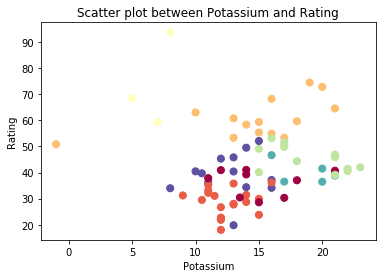

In [122]:
plt.scatter(X['carbo'], X['rating'], c=o_kmeans, s=50, cmap='Spectral')
plt.title('Scatter plot between Potassium and Rating')
plt.xlabel('Potassium')
plt.ylabel('Rating')
plt.show()

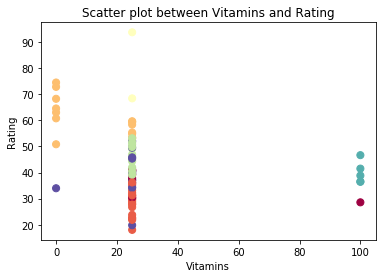

In [123]:
plt.scatter(X['vitamins'], X['rating'], c=o_kmeans, s=50, cmap='Spectral')
plt.title('Scatter plot between Vitamins and Rating')
plt.xlabel('Vitamins')
plt.ylabel('Rating')
plt.show()

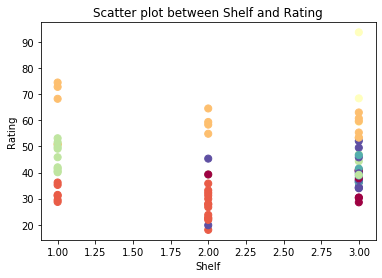

In [124]:
plt.scatter(X['shelf'], X['rating'], c=o_kmeans, s=50, cmap='Spectral')
plt.title('Scatter plot between Shelf and Rating')
plt.xlabel('Shelf')
plt.ylabel('Rating')
plt.show()

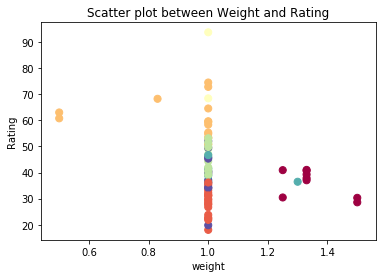

In [125]:
plt.scatter(X['weight'], X['rating'], c=o_kmeans, s=50, cmap='Spectral')
plt.title('Scatter plot between Weight and Rating')
plt.xlabel('weight')
plt.ylabel('Rating')
plt.show()

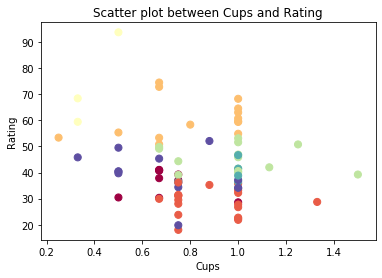

In [126]:
plt.scatter(X['cups'], X['rating'], c=o_kmeans, s=50, cmap='Spectral')
plt.title('Scatter plot between Cups and Rating')
plt.xlabel('Cups')
plt.ylabel('Rating')
plt.show()

In [ ]:
#import matplotlib.pyplot as plt
#from sklearn.decomposition import PCA
#pca = PCA(3)
#pca_data =pd.DataFrame(pca.fit_transform(X_standardized))
#print(pca_data.head())

In [ ]:
#from matplotlib import colors as mcolors 
#import math 
   
#''' Generating different colors in ascending order  
#                                of their hsv values '''
#colors = list(zip(*sorted(( 
 #                   tuple(mcolors.rgb_to_hsv( 
  #                        mcolors.to_rgba(color)[:3])), name) 
   #                  for name, color in dict( 
    #                        mcolors.BASE_COLORS, **mcolors.CSS4_COLORS 
     #                                                 ).items())))[1] 
   
   
# number of steps to taken generate n(clusters) colors  
#skips = math.floor(len(colors[5 : -5])/7) 
#cluster_colors = colors[5 : -5 : skips] 

In [ ]:
#from mpl_toolkits.mplot3d import Axes3D 
#import matplotlib.pyplot as plt 
   
#fig = plt.figure() 
#ax = fig.add_subplot(111, projection = '3d') 
#ax.scatter(pca_data[0], pca_data[1], pca_data[2],  
 #          c = list(map(lambda label : cluster_colors[label], 
  #                                          kmeans_model.labels_))) 
   
#str_labels = list(map(lambda label:'% s' % label, kmeans_model.labels_)) 
   
#list(map(lambda data1, data2, data3, str_label: 
 #       ax.text(data1, data2, data3, s = str_label, size = 5, 
 #       zorder = 20, color = 'k'), pca_data[0], pca_data[1], 
  #      pca_data[2], str_labels)) 
 #  
#plt.show()

In [ ]:
#from sklearn.datasets import make_blobs
#X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=7)
#plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');